In [ ]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import *
from keras.models import Sequential
import pathlib
import matplotlib.image as img

In [ ]:
#read dataset folder
data_path = pathlib.Path('/kaggle/input/cell-images-for-detecting-malaria/cell_images')

In [ ]:
#return folders inside cell_images
parasitized = list(data_path.glob('Parasitized/*'))
uninfected = list(data_path.glob('Uninfected/*'))

In [ ]:
#create dictionary for data labels
data_labels = {
    'parasitized' : parasitized,
    'uninfected' : uninfected
}

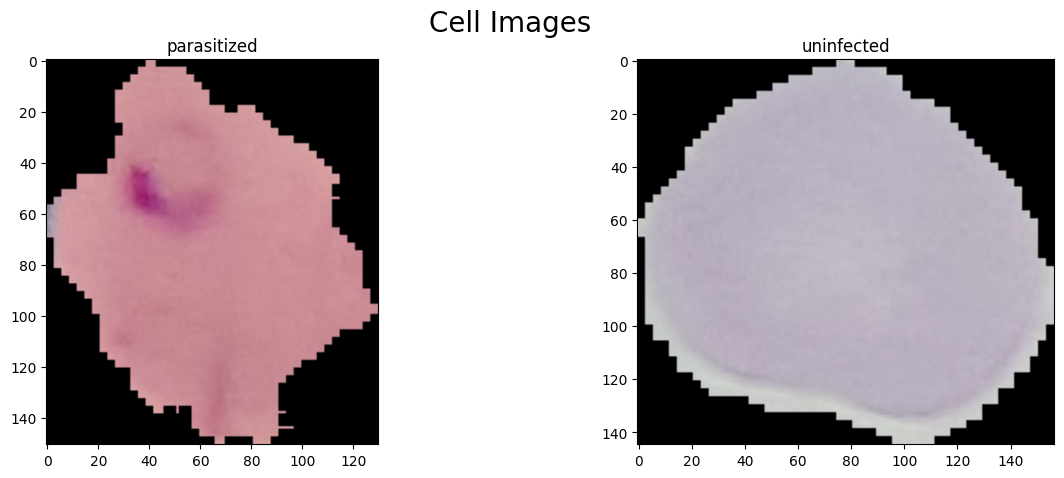

In [ ]:
#data visualization
fig,ax = plt.subplots(ncols = 2, figsize = (15,5))
fig.suptitle('Cell Images', fontsize = 20)

parasitized_img = img.imread(parasitized[0])
uninfected_img = img.imread(uninfected[0])

for index , name in enumerate(list(data_labels.keys())):
    ax[index].set_title(name)

ax[0].imshow(parasitized_img)
ax[1].imshow(uninfected_img)

In [ ]:
#image generator
data_generator = ImageDataGenerator(rescale = 1/255,
                                   validation_split = 0.25)

In [ ]:
#apply generator to generate train data
train_data = data_generator.flow_from_directory('/kaggle/input/cell-images-for-detecting-malaria/cell_images',
                                               target_size = (128,128),
                                               class_mode = 'binary',
                                               subset = 'training')

Found 41339 images belonging to 3 classes.


In [ ]:
#apply generator to generate test data
test_data = data_generator.flow_from_directory('/kaggle/input/cell-images-for-detecting-malaria/cell_images',
                                               target_size = (128,128),
                                               class_mode = 'binary',
                                               subset = 'validation')

Found 13777 images belonging to 3 classes.


In [ ]:
#model building
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu',input_shape = [128,128,3]))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))

#output layer ---> Binary Classification
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,304,321 (16.42 MB)

 Trainable params: 4,304,321 (16.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
model_history = model.fit(train_data,
                         epochs = 5,
                         validation_data = test_data)

Epoch 1/5
 404/1292 ━━━━━━━━━━━━━━━━━━━━ 2:56 199ms/step - accuracy: 0.2470 - loss: 0.0000e+00

2024-08-06 19:46:55.257613: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.44369, expected 2.71899
2024-08-06 19:46:55.257667: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.95863, expected 5.23392
2024-08-06 19:46:55.257678: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.40541, expected 4.6807
2024-08-06 19:46:55.257687: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 4.85326, expected 4.12856
2024-08-06 19:46:55.257695: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 5.28044, expected 4.55574
2024-08-06 19:46:55.257704: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 4.17778, expected 3.45307
2024-08-06 19:46:55.257712: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 4.26036, expected 3.53565
2024-08-06 19:46:55.257721: E external/local_xla/xla/ser

1290/1292 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.2474 - loss: 0.0000e+00

2024-08-06 19:51:34.646146: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16384: 4.17829, expected 3.61709
2024-08-06 19:51:34.646208: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16391: 3.8394, expected 3.2782
2024-08-06 19:51:34.646224: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16392: 4.02634, expected 3.46514
2024-08-06 19:51:34.646242: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16393: 3.87915, expected 3.31795
2024-08-06 19:51:34.646254: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16416: 4.5964, expected 4.0352
2024-08-06 19:51:34.646266: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16463: 4.5263, expected 3.9651
2024-08-06 19:51:34.646278: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16464: 3.85564, expected 3.29444
2024-08-06 19:51:34.646288: E ext

1292/1292 ━━━━━━━━━━━━━━━━━━━━ 363s 280ms/step - accuracy: 0.2474 - loss: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 0.0000e+00
Epoch 2/5
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 83s 64ms/step - accuracy: 0.2505 - loss: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 0.0000e+00
Epoch 3/5
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 89s 69ms/step - accuracy: 0.2499 - loss: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 0.0000e+00
Epoch 4/5
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 95s 73ms/step - accuracy: 0.2488 - loss: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 0.0000e+00
Epoch 5/5
 912/1292 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.2526 - loss: 0.0000e+00

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#RNN ---> LSTM
#transfer learning
#opencv
#Pretrained models
#text preprocessing
#projects